# 下準備

In [20]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
japanize_matplotlib.japanize()
%matplotlib inline
# なんかこれもサイトにあったけどよくわからん
# matplotlib.use('Agg')
# plt.style.use('ggplot')

In [6]:
df = pd.read_csv("/python/csv/1200.csv")

In [7]:
df.head()

,Unnamed: 0,クロス,決定力,ヘディング精度,ショートパス,ボレー,ドリブル,カーブ,FK精度,ロングパス,...,Height,Weight,Position,Overall Rating,Potential,Value,Wage,Preferred Foot,Weak Foot,Skill Moves
0,Lionel Andrés Messi Cuccittini,85.0,95.0,70.0,91.0,88.0,96.0,93.0,94.0,91.0,...,170cm,72kg,RW,93,93,€78M,€320K,Left,4,4
1,Robert Lewandowski,71.0,95.0,90.0,85.0,89.0,85.0,79.0,85.0,70.0,...,185cm,81kg,ST,92,92,€119.5M,€270K,Right,4,4
2,Kylian Mbappé Lottin,78.0,93.0,72.0,85.0,83.0,93.0,80.0,69.0,71.0,...,182cm,73kg,ST,91,95,€194M,€230K,Right,4,5
3,Mohamed Salah Ghaly,81.0,93.0,59.0,85.0,84.0,92.0,84.0,69.0,77.0,...,175cm,71kg,RW,91,91,€129M,€350K,Left,3,4
4,Kevin De Bruyne,94.0,81.0,55.0,93.0,83.0,88.0,85.0,83.0,93.0,...,181cm,70kg,CM,91,91,€125.5M,€350K,Right,5,4


# ざっと主成分分析

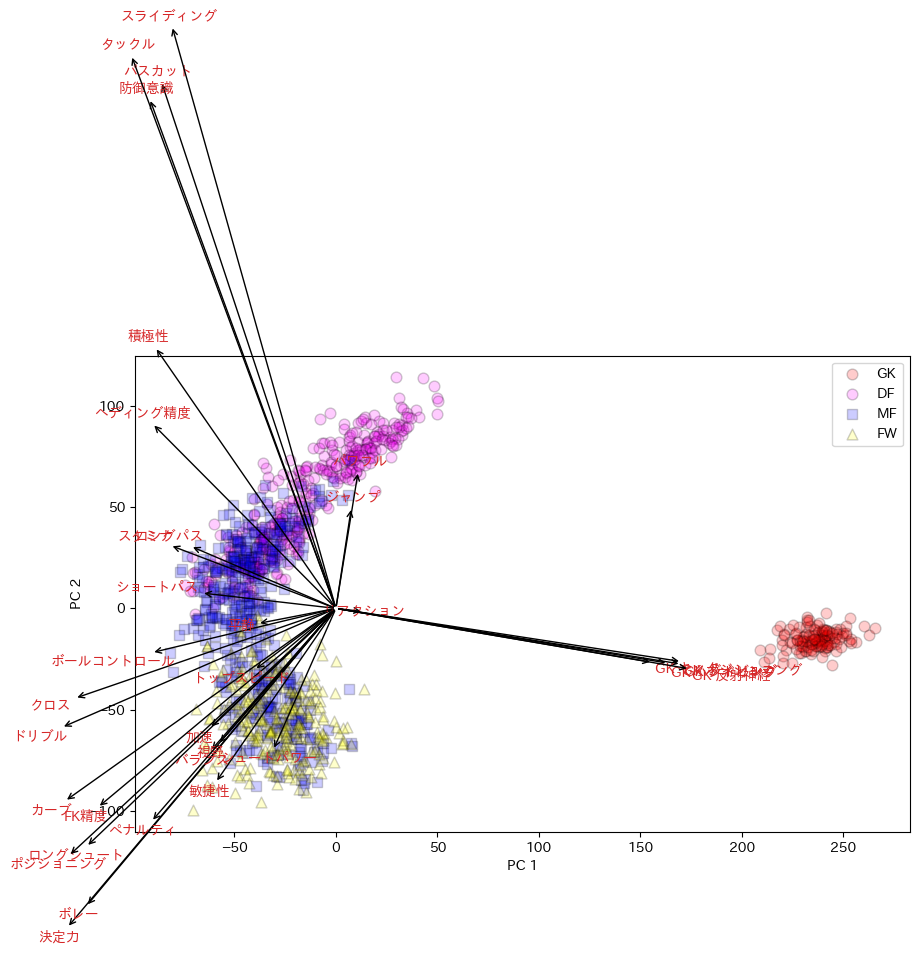

In [8]:
X = df.iloc[0:,1:35].values #選手別のデータ
C = df.iloc[:,0].values #選手名
F = df.columns[1:35].values #能力値名

from sklearn.decomposition import PCA

pca = PCA()
P = pca.fit_transform(X)

pd.options.display.float_format = '{:.2f}'.format
# 主成分分析により、各データ点を第1から第16主成分に射影したときの主成分得点を表形式で表示する。
dfPc = pd.DataFrame(P, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=C)

fig = plt.figure(dpi=100, figsize=(10,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
# ax.set_ylabel('PC 3')
ax.set_aspect('equal')


GK = ['GK']
DF = ['CB','RB','LB','RWB','LWB']
MF = ['RM','CM','LM','CDM','CAM']
FW = ['RF','CF','LF','RW','ST','LW']
# CDM = ['CDM']
# CAM = ['CAM']

GK_x = []
GK_y = []
DF_x = []
DF_y = []
MF_x = []
MF_y = []
FW_x = []
FW_y = []
# CDM_x = []
# CDM_y = []
# CAM_x = []
# CAM_y = []

y = 1

for i in range(0,1200):
    if(df['Position'][i] in GK):
        GK_x.append(P[:, 0][i])
        GK_y.append(P[:, y][i])
    if(df['Position'][i] in DF):
        DF_x.append(P[:, 0][i])
        DF_y.append(P[:, y][i])
    if(df['Position'][i] in MF):
        MF_x.append(P[:, 0][i])
        MF_y.append(P[:, y][i])
    if(df['Position'][i] in FW):
        FW_x.append(P[:, 0][i])
        FW_y.append(P[:, y][i])
    # if(df['Position'][i] in CDM):
    #     CDM_x.append(P[:, 0][i])
    #     CDM_y.append(P[:, y][i])
    # if(df['Position'][i] in CAM):
    #     CAM_x.append(P[:, 0][i])
    #     CAM_y.append(P[:, y][i])


al = 0.2

ax.scatter(GK_x, GK_y, alpha=al,s=60, linewidths=1, color = "red", marker='o', edgecolors='black', label='GK')    
ax.scatter(DF_x, DF_y, alpha=al,s=60, linewidths=1, color = "magenta", marker='o', edgecolors='black', label='DF')
ax.scatter(MF_x, MF_y, alpha=al,s=60, linewidths=1, color = "blue", marker='s', edgecolors='black', label='MF')
ax.scatter(FW_x, FW_y, alpha=al,s=60, linewidths=1, color = "yellow", marker='^', edgecolors='black', label='FW')

# ax.scatter(CDM_x, CDM_y, alpha=al,s=100, linewidths=1, color = "black", marker='*', edgecolors='black', label='CDM')
# ax.scatter(CAM_x, CAM_y, alpha=al,s=100, linewidths=1, color = "cyan", marker='h', edgecolors='black', label='CAM')

for i, label in enumerate(F):
    ax.annotate(
        label, xy=(0, 0), xytext=pca.components_[:2,i] * 700, size = 10,
        color="tab:red", arrowprops=dict(arrowstyle='<-', color="black")
    )

ax.legend(loc='upper right')
# ax.grid()
plt.show()

# クラスタにわけてみる

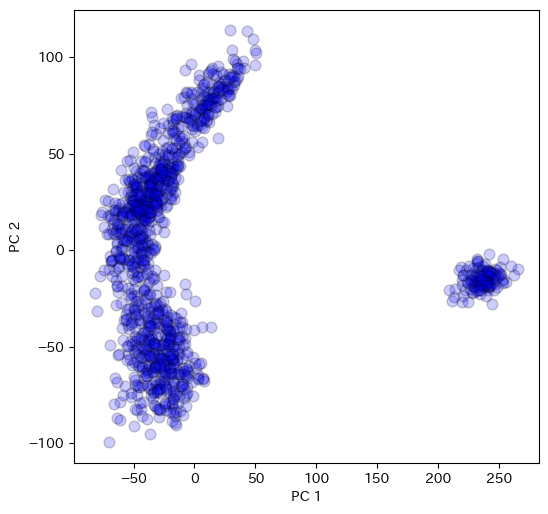

In [10]:
fig = plt.figure(dpi=100, figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
# ax.set_aspect('equal')
ax.scatter(dfPc['PC1'], dfPc['PC2'], alpha=al,s=60, linewidths=1, color = "blue", marker='o', edgecolors='black')   
plt.show()

In [11]:
xy = dfPc.loc[:, ['PC1', 'PC2']].values
num_clusters = 4 #四つのポジションポジションになるようにクラスタ四つ
clf = KMeans(n_clusters = num_clusters) # モデルの設定
clf.fit(xy) # クラスタリングの計算
pred = clf.predict(xy) # 計算結果からサンプルデータがどのクラスタに属するかを予測する

# 分類結果を追加する

dfPc['cluster_id'] = pred

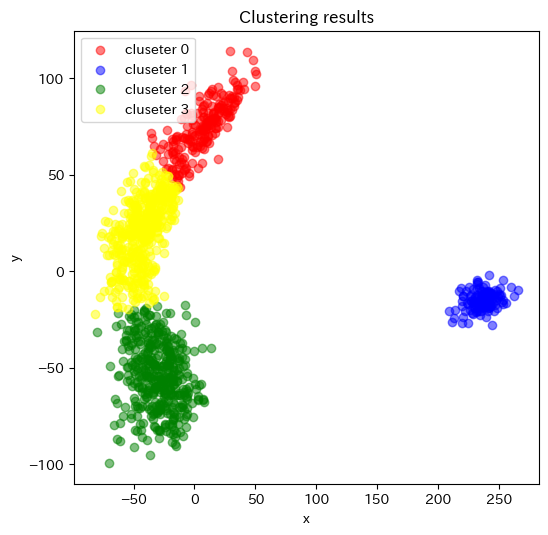

In [12]:
fig = plt.figure(dpi=100, figsize=(6,6))
ax = fig.add_subplot(1,1,1)
colors = ['Red', 'Blue', 'Green','Yellow']
 
for cls in range(num_clusters):
    x = dfPc.loc[dfPc['cluster_id'] == cls, 'PC1']
    y = dfPc.loc[dfPc['cluster_id'] == cls, 'PC2']
    ax.scatter(x, y, alpha=0.5, label=f"cluseter {cls}", color=colors[cls])
 
ax.set_title("Clustering results")
ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_xlim(-1, 11)
# ax.set_ylim(-1, 11)
ax.legend(loc='upper left')
# plt.savefig('cluster_scatter.png', dpi=300, facecolor='white')
plt.show()

# それぞれの主成分がどういうものかプロット、累積寄与率

<AxesSubplot:>

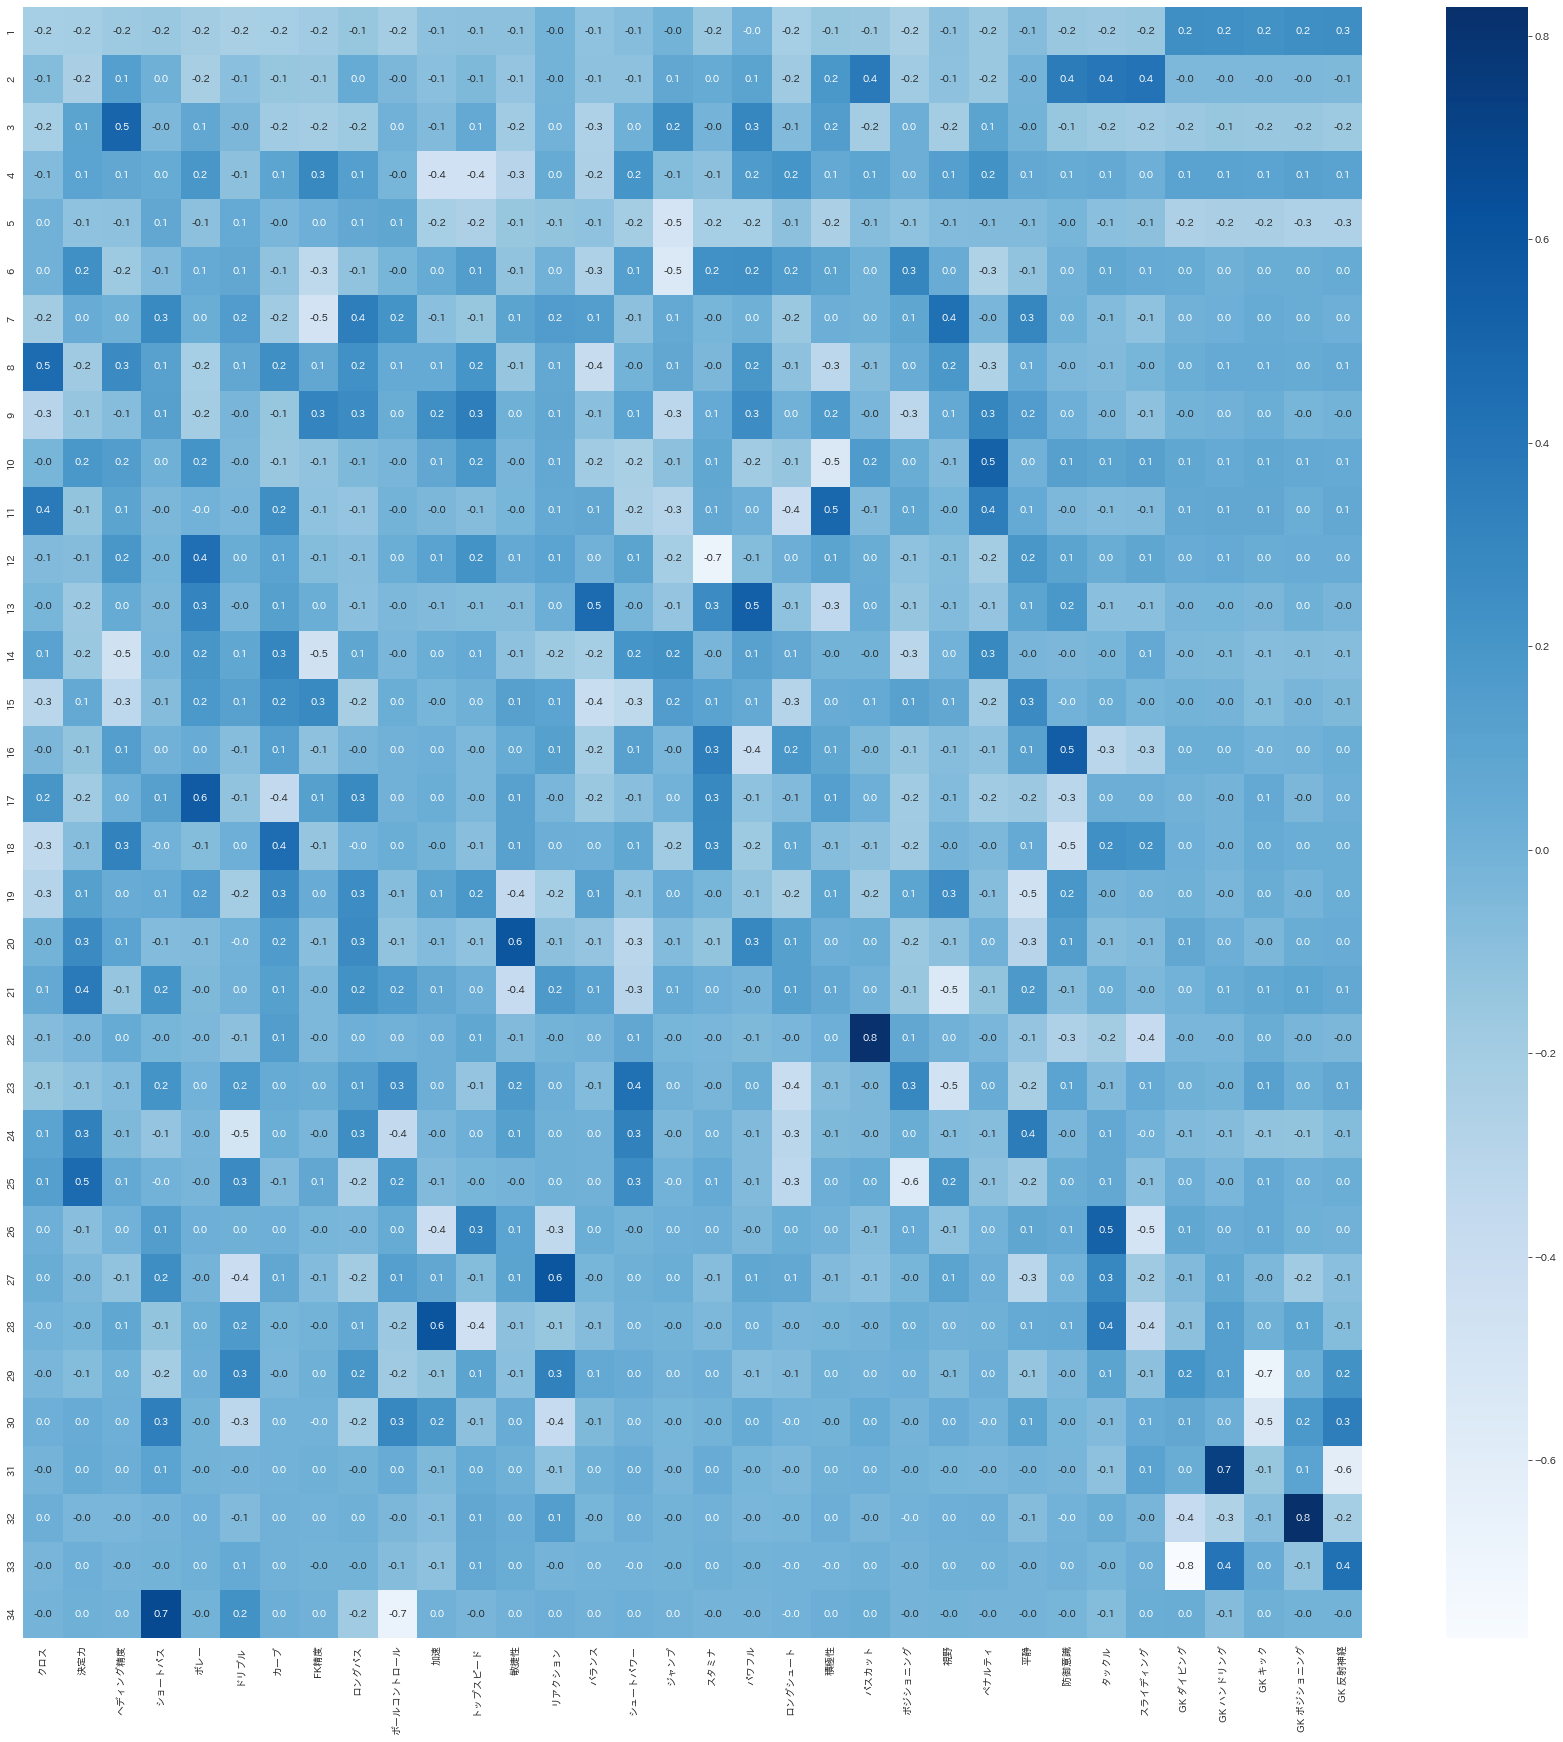

In [21]:
plt.figure(figsize=(30, 30))
sns.heatmap(pca.components_, 
            cmap='Blues', 
            annot=True, 
            # annot_kws={"size": 20},
            fmt="1.1f",
            xticklabels=df.loc[:, 'クロス':'GK 反射神経'].columns,
            yticklabels=[x for x in range(1,35)])

PC1は青が濃い部分を正に強く見ていて、青が薄いつまり白に近い部分を負に強く見ている。つまりキーパーの能力が正に大きいのを強く見つつ、クロスなど能力が低いと,PC1では正となる。

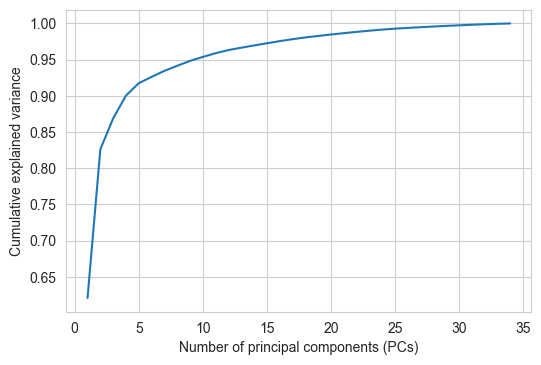

In [19]:
# 用いる主成分の数を横軸、累積寄与率を縦軸としてグラフを描画する
# 第2主成分までで元データの分散の約70%、第4主成分までで元データの分散の約90%を説明できることが分かる
plt.figure(dpi=100)
plt.subplot(1,1,1)

plt.plot(np.arange(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components (PCs)')
plt.ylabel('Cumulative explained variance')
plt.show()